# Linear Regression Exercises

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 9.2 MB/s eta 0:00:00


In [ ]:
# workbook example
import mglearn
data = mglearn.datasets.make_wave(n_samples=60)
print(data, "\n\n")
print("data[0]: \n\n", data[0][0])
print("data[1]: \n\n" ,data[1][0])

(array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547],
       [-2.87649303],
       [ 2.81945911],
       [ 1.99465584],
       [-1.72596534],
       [-1.9090502 ],
       [-1.89957294],
       [-1.17454654],
       [ 0.14853859],
       [-0.40832989],
       [-1.25262516],
       [ 0.67111737],
       [-2.16303684],
       [-1.24713211],
       [-0.80182894],
       [-0.26358009],
       [ 1.71105577],
       [-1.80195731],
       [ 0.08540663],
       [ 0.55448741],
       [-2.72129752],
       [ 0.64526911],
       [-1.97685526],
       [-2.60969044],
       [ 2.69331322],
       [ 2.7937922 ],
       [ 1.85038409],
       [-1.17231738],
       [-2.41396732],
       [ 1.10539816],
       [-0.35908504],
       [-2.26777059],
       [-0.02893854],
       [-2.79366887],
       [ 2.45592241],
       [-1.44732011],
       [ 

In [ ]:
type(data)  # tuple
# so info() can't be used with it
#data.info()

tuple

In [ ]:
# laoidng dataset
X, y = mglearn.datasets.make_wave(n_samples=60)
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)
# training the model
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
# checking parametrers
#y=mx+b
# m: slope / coef
# b: intercept / bias
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


- The intercept_ attribute is always a single float number
- the coef_ attribute is a NumPy array with
one entry per input feature.
- As there is only a single input feature in the wave dataset, lr.coef_ only has a single entry

# Age _Height Data

In [ ]:
!ls /content/drive/MyDrive/MLPractical

 Age_Height_Data_1_to_20.csv	      ML_Lab_01.ipynb
 array_2d.txt			      ML_Lab_02.ipynb
 array_archive.npz		     'ML_Lab 03_Naive Bayes.ipynb'
 array_file.txt			     'ML Lab 04_Nearest Neighbour.ipynb'
 Boston_Dataset.csv		      ML_Lab05_LR_KNNR.ipynb
 D1_Movie_Revenue_Dataset_Clean.csv  'ML Workbook 2024.pdf'
 D1_Movie_Revenue_Dataset.csv	     'N6_Linear Regression.ipynb'
 D3_Heart_Dataset.csv		      PRACTICAL-SPRING25.jpg
 D6_Heart_Dataset_2.csv		      some_array.npy
 D6_Heart_Dataset_2.gsheet	      some_array.txt.npy
 data.txt


In [ ]:
import pandas as pd
PATH = '/content/drive/MyDrive/MLPractical'
data=pd.read_csv(f'{PATH}/Age_Height_Data_1_to_20.csv')
data

,Age,Height_cm
0,7,129.20
1,20,186.86
2,15,160.88
3,11,161.65
4,8,143.44
...,...,...
1995,2,110.91
1996,6,129.96
1997,17,165.02
1998,3,112.52


In [ ]:
# Description of data
data.describe()

,Age,Height_cm
count,2000.000000,2000.000000
mean,10.266500,148.366605
std,5.810108,26.702782
min,1.000000,88.250000
25%,5.000000,125.697500
50%,10.000000,153.470000
75%,15.000000,168.865000
max,20.000000,202.270000


In [ ]:
# Displaying general info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        2000 non-null   int64  
 1   Height_cm  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [ ]:
# Checking first five rows using head attribute
data.head()

,Age,Height_cm
0,7,129.20
1,20,186.86
2,15,160.88
3,11,161.65
4,8,143.44


In [ ]:
# Describing the target column
data["Height_cm"].describe()

,Height_cm
count,2000.000000
mean,148.366605
std,26.702782
min,88.250000
25%,125.697500
50%,153.470000
75%,168.865000
max,202.270000


# Note:
Data is clean and preprocessed.

# Separating features and target

In [ ]:
#Separating the feature into variable X
X=data['Age'] #extracts column as a series
type(X)
X=data[['Age']] #extracts column as a dataframe
type(X)

pandas.core.frame.DataFrame

In [ ]:
#Separating the target into variable Y
## separating target
#Y = data["target"]
Y=data[['Height_cm']]
type(Y)

pandas.core.frame.DataFrame

# Visulazing Data using scatter plot

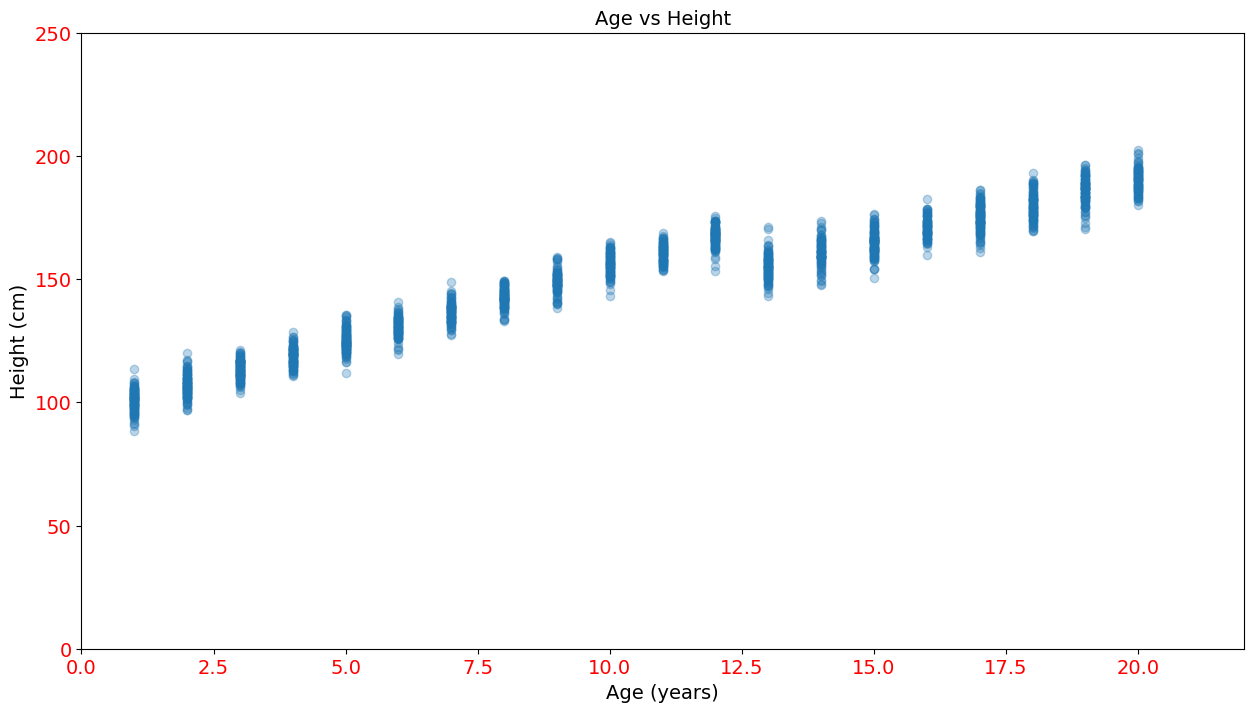

In [ ]:
#Visualizing Data
plt.figure(figsize=(15,8))
plt.scatter(X,Y,alpha=0.3) #alpha sets transparency of dots
plt.title('Age vs Height',fontsize=14)
plt.xlabel('Age (years)',fontsize=14)
plt.ylabel('Height (cm)',fontsize=14)
plt.xticks(color='red',fontsize=14)
plt.yticks(color='red',fontsize=14)
plt.xlim(0,22)
plt.ylim(0,250)
plt.show()

# Splitting the Dataset into train and test sets

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.20,random_state=0)
# Running the code multiple times will always produce the same output for X_train and X_test
# because random_state=0 ensures the split is deterministic.
print(X_train.shape )
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1600, 1)
(400, 1)
(1600, 1)
(400, 1)


# Training
You might train using train dataset only and compare using test dataset

In [ ]:
#Fitting Linear Regression Model
lr=LinearRegression() #Creates an object of LinearRegression type
lr.fit(X_train,Y_train) #Does the training to select optimal values of the parameters
#lr.fit(X,Y)  # train using entire data

LinearRegression()

# Reading coefficient and intercept

In [ ]:
#y=mx+b
# y_pred =  b + wx = w0 +w1x1
# m: slope / coef/ w1/ theta1
# b: intercept / bias
# bias (b) or w0/ theta0
b=lr.intercept_[0]
# coef (w)
w=lr.coef_[0][0]
print("coef: ", w)
print("bias: ", b)

coef:  4.447286649625049
bias:  102.52723829095979


# Reading R-square value (the goodness of fit)

In [ ]:
R_sq_train= lr.score(X_train,Y_train)
print("R_sq_train:",R_sq_train)
# R^2= 0.9365587583635591  # very good as appraches to 1
R_sq_test= lr.score(X_test,Y_test)
print("R_sq_test:",R_sq_test)
# R^2= 0.9295235979938452  # very good as appraches to 1

R_sq_train: 0.9365587583635591
R_sq_test: 0.9295235979938452


#Making predictions

In [ ]:
#Approach 1: Using the equation of linear regression
x= 12
y_pred = b + w * x  # 12 is age in years
print("Age = ", x, "years and predicteded Height in cm is ", y_pred)

Age =  12 years and predicteded Height in cm is  155.89467808646037


In [ ]:
#Approach 2: Using the predict method
y_pred=lr.predict(pd.DataFrame([x]))
print("Age = ", x, "years and predicteded Height in cm is ", y_pred)

Age =  12 years and predicteded Height in cm is  [[155.89467809]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#Making predictions for the whole dataset
y_pred=lr.predict(X_train)
y_pred

array([[124.76367154],
       [191.47297128],
       [115.86909824],
       ...,
       [187.02568463],
       [115.86909824],
       [124.76367154]])

In [ ]:
# making predictions for test data
y_pred_test=lr.predict(X_test)
y_pred_test

array([[160.34196474],
       [147.00010479],
       [147.00010479],
       [191.47297128],
       [191.47297128],
       [160.34196474],
       [138.10553149],
       [120.31638489],
       [182.57839798],
       [155.89467809],
       [155.89467809],
       [142.55281814],
       [182.57839798],
       [173.68382468],
       [169.23653804],
       [178.13111133],
       [178.13111133],
       [160.34196474],
       [138.10553149],
       [178.13111133],
       [160.34196474],
       [173.68382468],
       [111.42181159],
       [133.65824484],
       [169.23653804],
       [111.42181159],
       [164.78925139],
       [147.00010479],
       [147.00010479],
       [169.23653804],
       [169.23653804],
       [155.89467809],
       [173.68382468],
       [155.89467809],
       [106.97452494],
       [155.89467809],
       [160.34196474],
       [155.89467809],
       [160.34196474],
       [115.86909824],
       [115.86909824],
       [178.13111133],
       [191.47297128],
       [155

# Displaying predcited and true values side by side

In [ ]:
i=6
print ("X_test: ", X_test.loc[i])
print ("Y_test: ", Y_test.loc[i])
print ("y_pred_test: ", y_pred_test[i])

X_test:  Age    19
Name: 6, dtype: int64
Y_test:  Height_cm    181.62
Name: 6, dtype: float64
y_pred_test:  [138.10553149]


# Plotting fit line over scatter plot

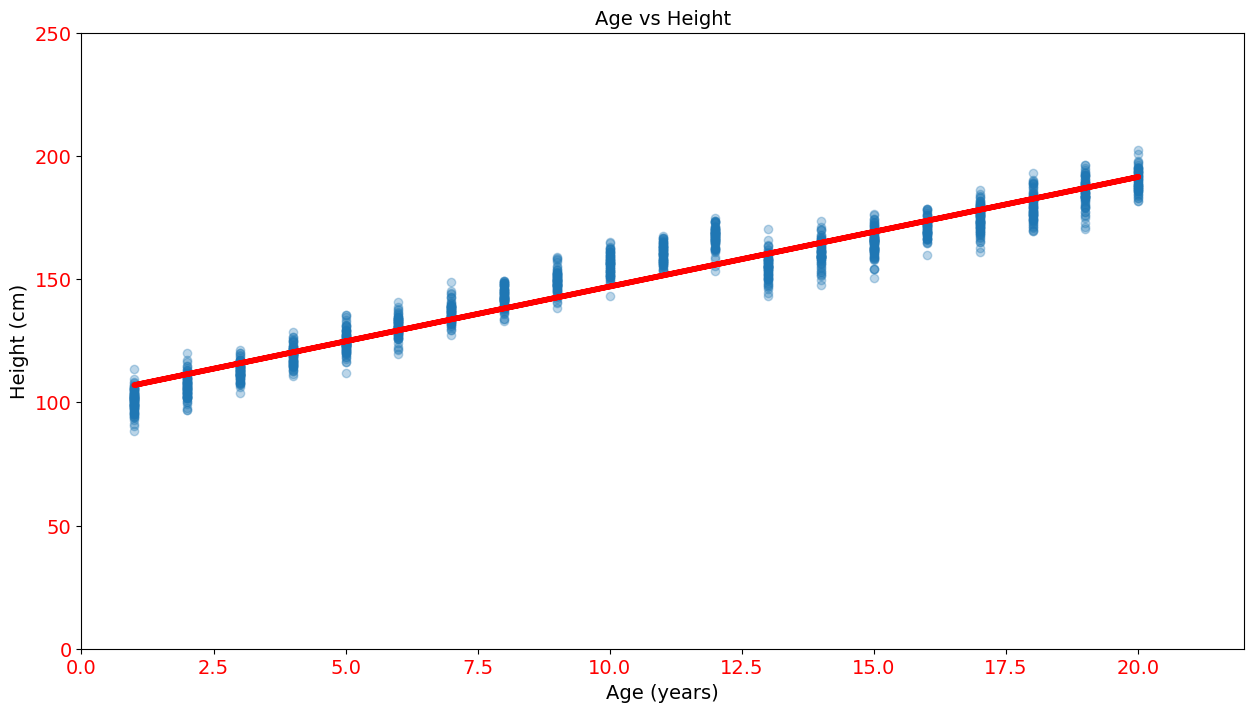

In [ ]:
#Visualizing Data
plt.figure(figsize=(15,8))
plt.scatter(X_train,Y_train,alpha=0.3) #alpha sets transparency of dots
plt.title('Age vs Height',fontsize=14)
plt.xlabel('Age (years)',fontsize=14)
plt.ylabel('Height (cm)',fontsize=14)
plt.xticks(color='red',fontsize=14)
plt.yticks(color='red',fontsize=14)
plt.xlim(0,22)
plt.ylim(0,250)
plt.plot(X_train,lr.predict(X_train),color='red',linewidth=4)
plt.show()

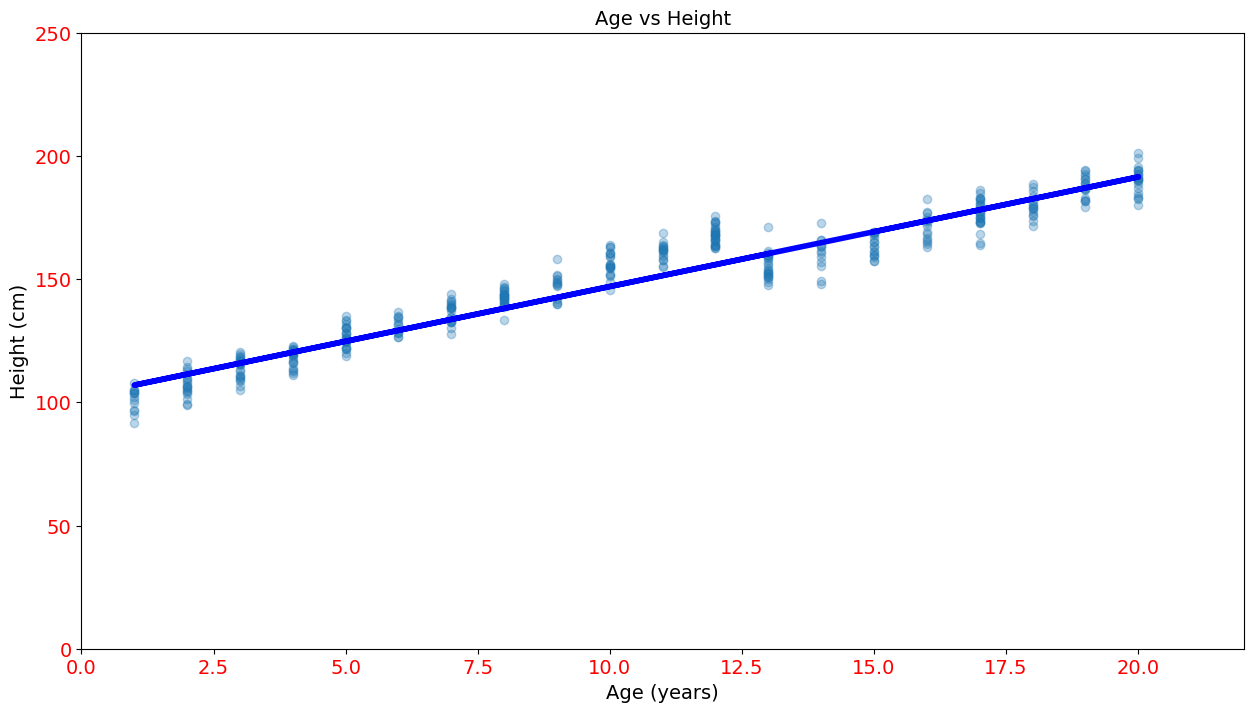

In [ ]:
# plotting fit over test data
#Visualizing Data
plt.figure(figsize=(15,8))
plt.scatter(X_test,Y_test,alpha=0.3) #alpha sets transparency of dots
plt.title('Age vs Height',fontsize=14)
plt.xlabel('Age (years)',fontsize=14)
plt.ylabel('Height (cm)',fontsize=14)
plt.xticks(color='red',fontsize=14)
plt.yticks(color='red',fontsize=14)
plt.xlim(0,22)
plt.ylim(0,250)
plt.plot(X_test,y_pred_test,color='blue',linewidth=4)
plt.show()

# KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
PATH = '/content/drive/MyDrive/MLPractical'
data=pd.read_csv(f'{PATH}/D6_Heart_Dataset_2.csv')
data

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Description of data
data.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Displaying general info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Checking first five rows using head attribute
data.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Describing the target column
data["target"].describe()

,target
count,303.000000
mean,0.544554
std,0.498835
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


#Separating features and target

In [ ]:
# separating predictors
X = data.drop("target",axis=1) # axis=1 is for column, 0 for row entire col would be dropped out
X

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
# separating target
Y = data["target"]
Y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


# Splitting into train & test sets

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.20,random_state=0)
# Running the code multiple times will always produce the same output for X_train and X_test
# because random_state=0 ensures the split is deterministic.
print(X_train.shape )
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(242, 13)
(61, 13)
(242,)
(61,)


# Creating KNN  regressor

In [ ]:
# instantiate the model and set the number of neighbors to consider to 3
kreg = KNeighborsRegressor(n_neighbors=3)
# kreg = KNeighborsRegressor(n_neighbors=3, weights='distance')
# use weighted average,if more weight is to be assigne dto closer neighbours

In [ ]:
# training the model
model= kreg.fit(X_train, Y_train)

In [ ]:
# Evaluating the model
Y_pred = model.predict(X_test)
# kreg.predict(X_test)


# Displaying predcited and true values side by side

In [ ]:
results = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(results)

     Actual  Predicted
225       0   0.000000
152       1   0.333333
228       0   0.666667
201       0   0.000000
52        1   0.333333
..      ...        ...
146       1   0.333333
302       0   1.000000
26        1   0.333333
108       1   0.666667
89        1   0.333333

[61 rows x 2 columns]
